## Mean-Volatility Modeling

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

start_date = '2018-01-01'
data = yf.download(
    '^GSPC',
    start = start_date,
    interval = '1d',
    progress = False
)

In [2]:
ret = data['Close'].pct_change().dropna()
ret.head()

Date
2018-01-03    0.006399
2018-01-04    0.004029
2018-01-05    0.007034
2018-01-08    0.001662
2018-01-09    0.001303
Name: Close, dtype: float64

### 1. AR-GARCH Model

In [23]:
import arch 
import warnings
warnings.filterwarnings('ignore')

garch_model1 = arch.arch_model(
    ret, 
    vol = 'GARCH', 
    p = 2, q = 1,
    mean = 'AR',
    lags = [1, 2]
)
result1 = garch_model1.fit()
print(result1.summary())

Iteration:      1,   Func. Count:      9,   Neg. LLF: 1.7620721498445856e+21
Iteration:      2,   Func. Count:     25,   Neg. LLF: 1.1728026623079884e+20
Iteration:      3,   Func. Count:     41,   Neg. LLF: 5365509587302647.0
Iteration:      4,   Func. Count:     55,   Neg. LLF: 6.370889684966166e+19
Iteration:      5,   Func. Count:     71,   Neg. LLF: 6837177052516638.0
Iteration:      6,   Func. Count:     84,   Neg. LLF: -5388.598485837106
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5388.5984813303985
            Iterations: 10
            Function evaluations: 84
            Gradient evaluations: 6
                           AR - GARCH Model Results                           
Dep. Variable:                  Close   R-squared:                       0.029
Mean Model:                        AR   Adj. R-squared:                  0.028
Vol Model:                      GARCH   Log-Likelihood:                5388.60
Distribution:            

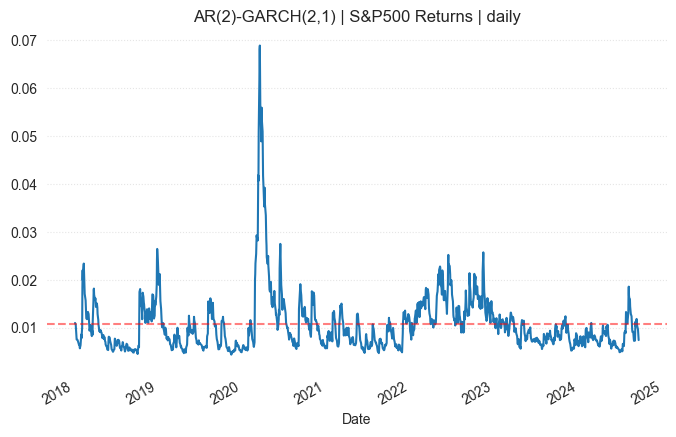

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
result1.conditional_volatility.plot(ax = ax)
plt.axhline(
    result1.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'AR(2)-GARCH(2,1) | S&P500 Returns | daily')
plt.show()

### 2. ARMA-GARCH Model

In [25]:
import statsmodels.api as sm

arma = sm.tsa.ARIMA(
    ret, 
    order = (1, 0, 1)
).fit()

In [26]:
print(arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1689
Model:                 ARIMA(1, 0, 1)   Log Likelihood                5017.763
Date:                Sat, 21 Sep 2024   AIC                         -10027.526
Time:                        00:32:29   BIC                         -10005.798
Sample:                             0   HQIC                        -10019.480
                               - 1689                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.829      0.067   -3.74e-05       0.001
ar.L1         -0.5067      0.047    -10.830      0.000      -0.598      -0.415
ma.L1          0.3564      0.051      6.960      0.0

In [27]:
a = arma.resid

In [28]:
arma_garch = arch.arch_model(
    a, vol = 'GARCH', 
    p = 2, q = 1,
    mean = 'Constant'
)
result2 = arma_garch.fit()
print(result2.summary())

Iteration:      1,   Func. Count:      7,   Neg. LLF: 46832501826.05924
Iteration:      2,   Func. Count:     21,   Neg. LLF: 4470323287.491325
Iteration:      3,   Func. Count:     34,   Neg. LLF: -5398.946622801432
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5398.946618371296
            Iterations: 7
            Function evaluations: 34
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5398.95
Distribution:                  Normal   AIC:                          -10787.9
Method:            Maximum Likelihood   BIC:                          -10760.7
                                        No. Observations:                 1689
Date:                S

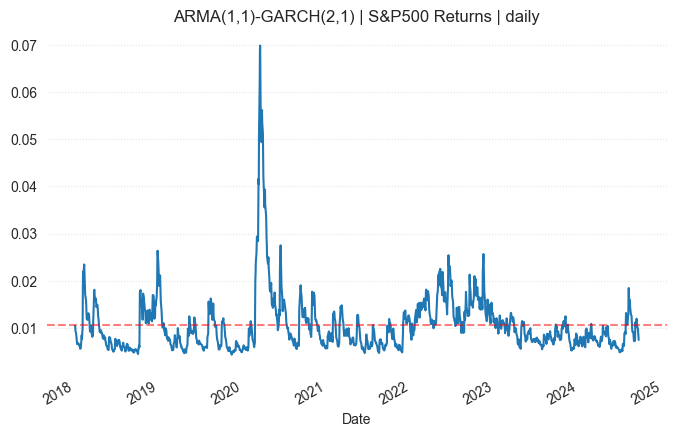

In [29]:
fig, ax = plt.subplots(figsize=(8, 5))
result2.conditional_volatility.plot(ax = ax)
plt.axhline(
    result2.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'ARMA(1,1)-GARCH(2,1) | S&P500 Returns | daily')
plt.show()

### 3. Fractional Integrated GARCH

#### 3-1. ARMA-FIGARCH

In [32]:
arma_figarch = arch.arch_model(
    a,
    vol = 'FIGARCH', 
    p = 1, 
    q = 1, 
    power = 0.5
).fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 38272337.05823652
Iteration:      2,   Func. Count:     23,   Neg. LLF: 11647.3028364868
Iteration:      3,   Func. Count:     33,   Neg. LLF: -59.217824763343344
Iteration:      4,   Func. Count:     40,   Neg. LLF: -4384.31451698771
Iteration:      5,   Func. Count:     47,   Neg. LLF: -4283.497766899463
Iteration:      6,   Func. Count:     54,   Neg. LLF: -4537.994791860956
Iteration:      7,   Func. Count:     61,   Neg. LLF: -5371.051889553725
Iteration:      8,   Func. Count:     67,   Neg. LLF: -5375.404776274149
Iteration:      9,   Func. Count:     73,   Neg. LLF: -5376.688255823241
Iteration:     10,   Func. Count:     79,   Neg. LLF: -5379.2214155839665
Iteration:     11,   Func. Count:     85,   Neg. LLF: -5381.227877298115
Iteration:     12,   Func. Count:     91,   Neg. LLF: -5374.887111316664
Iteration:     13,   Func. Count:     98,   Neg. LLF: -5377.9327692391125
Iteration:     14,   Func. Count:    105,   Neg. LLF

In [33]:
print(arma_figarch.summary())

               Constant Mean - Power FIGARCH (power: 0.5) Model Results               
Dep. Variable:                           None   R-squared:                       0.000
Mean Model:                     Constant Mean   Adj. R-squared:                  0.000
Vol Model:         Power FIGARCH (power: 0.5)   Log-Likelihood:                5384.15
Distribution:                          Normal   AIC:                          -10758.3
Method:                    Maximum Likelihood   BIC:                          -10731.1
                                                No. Observations:                 1689
Date:                        Sat, Sep 21 2024   Df Residuals:                     1688
Time:                                00:33:14   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
---------------------------------------------------------------

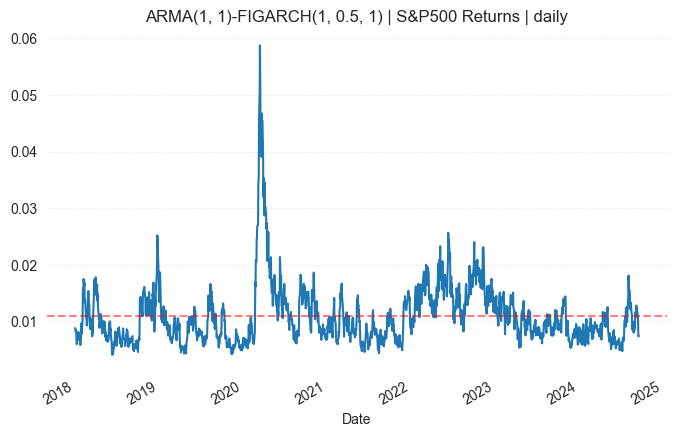

In [35]:
fig, ax = plt.subplots(figsize=(8, 5))
arma_figarch.conditional_volatility.plot(ax = ax)
plt.axhline(
    arma_figarch.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'ARMA(1, 1)-FIGARCH(1, 0.5, 1) | S&P500 Returns | daily')
plt.show()

#### 3-2. ARFIMA-FIGARCH

In [45]:
from quant_free.finml.statsmodels_extension.arfima import ARFIMA

arfima = ARFIMA(data['Close'], order = (8, 0.7, 7)).fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59555D+02    |proj g|=  9.02588D+02

At iterate    5    f=  5.30711D+00    |proj g|=  3.06639D-01

At iterate   10    f=  5.25770D+00    |proj g|=  5.17358D-02

At iterate   15    f=  5.24861D+00    |proj g|=  1.87329D-02

At iterate   20    f=  5.24800D+00    |proj g|=  6.91619D-03

At iterate   25    f=  5.24754D+00    |proj g|=  6.54338D-03

At iterate   30    f=  5.24745D+00    |proj g|=  2.14166D-03

At iterate   35    f=  5.24721D+00    |proj g|=  5.05818D-03

At iterate   40    f=  5.24695D+00    |proj g|=  6.94623D-03

At iterate   45    f=  5.24680D+00    |proj g|=  3.28400D-03

At iterate   50    f=  5.24672D+00    |proj g|=  4.76340D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

In [46]:
print(arfima.summary())

                           ARFIMA Results
Dep. Variable:   predicted               No. Observations: 1319     
Model:           ARFIMA(8, 0.7, 7)       Log Likelihood    -6920.418
Date:            Sat, 21 Sep 2024        AIC               13872.836
Time:            00:44:23                BIC               13955.790
Covariance Type: opg                     HQIC              13903.938
Sample:          06-25-2019 - 09-19-2024                            
---------------------------------------------------------------------
               coef    std err     t     P>|t|     [0.025     0.975] 
---------------------------------------------------------------------
ar.L1         -1.1355   0.1393  -8.1499  0.0000    -1.4085    -0.8624
ar.L2         -0.7286   0.1331  -5.4742  0.0000    -0.9895    -0.4677
ar.L3         -0.6067   0.1078  -5.6292  0.0000    -0.8179    -0.3955
ar.L4          0.1042   0.0834   1.2505  0.2111    -0.0591     0.2676
ar.L5          0.7157   0.0846   8.4611  0.0000     0.

In [50]:
a = arfima.resid.iloc[1:]

In [53]:
arfima_figarch = arch.arch_model(
    a,
    vol = 'FIGARCH',
    p = 1,
    q = 1,
    power = 0.5
).fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 11855.718472121107
Iteration:      2,   Func. Count:     18,   Neg. LLF: 11375.43020319397
Iteration:      3,   Func. Count:     25,   Neg. LLF: 7431.990908833168
Iteration:      4,   Func. Count:     32,   Neg. LLF: 6995.734277275176
Iteration:      5,   Func. Count:     39,   Neg. LLF: 8029.81468105528
Iteration:      6,   Func. Count:     47,   Neg. LLF: 7512.329825208222
Iteration:      7,   Func. Count:     54,   Neg. LLF: 6746.857944434674
Iteration:      8,   Func. Count:     60,   Neg. LLF: 6744.5555220836995
Iteration:      9,   Func. Count:     66,   Neg. LLF: 6746.485350346382
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6743.035342021527
Iteration:     11,   Func. Count:     80,   Neg. LLF: 6739.788221860645
Iteration:     12,   Func. Count:     86,   Neg. LLF: 6739.6113054980815
Iteration:     13,   Func. Count:     93,   Neg. LLF: 6739.181378126597
Iteration:     14,   Func. Count:     99,   Neg. LLF: 6739.175

In [54]:
print(arfima_figarch.summary())

               Constant Mean - Power FIGARCH (power: 0.5) Model Results               
Dep. Variable:                           None   R-squared:                       0.000
Mean Model:                     Constant Mean   Adj. R-squared:                  0.000
Vol Model:         Power FIGARCH (power: 0.5)   Log-Likelihood:               -6739.01
Distribution:                          Normal   AIC:                           13488.0
Method:                    Maximum Likelihood   BIC:                           13513.9
                                                No. Observations:                 1318
Date:                        Sat, Sep 21 2024   Df Residuals:                     1317
Time:                                00:46:40   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
-----------------------------------------------------------------------

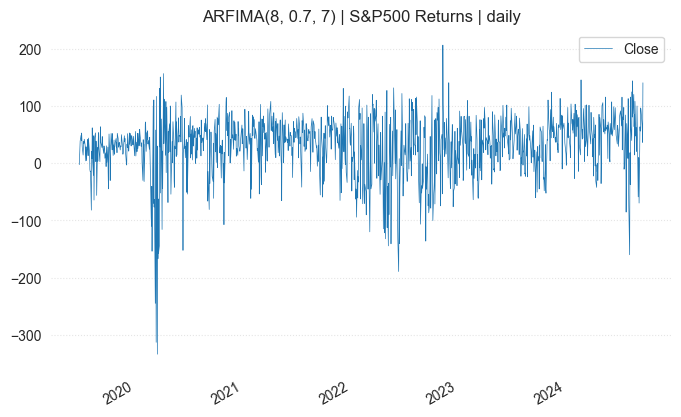

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))
arfima.fittedvalues.plot(ax = ax, lw = 0.5)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'ARFIMA(8, 0.7, 7) | S&P500 Returns | daily')
plt.show()

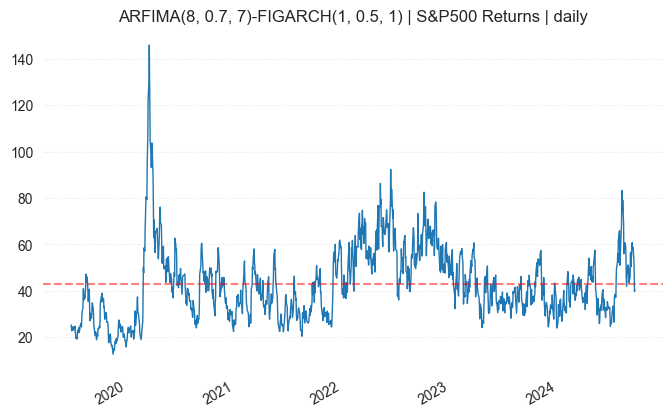

In [62]:
fig, ax = plt.subplots(figsize=(8, 5))
arfima_figarch.conditional_volatility.plot(ax = ax, lw = 1)
plt.axhline(
    arfima_figarch.conditional_volatility.mean(),
    color = 'red', 
    linestyle = '--', 
    alpha = 0.5
)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.grid(False)
ax.yaxis.grid(True, ls=':', alpha=0.5)
plt.title(r'ARFIMA(8, 0.7, 7)-FIGARCH(1, 0.5, 1) | S&P500 Returns | daily')
plt.show()